#Lab-1

Task 1

In [1]:
!pip install diffusers transformers accelerate torch

In [2]:
from diffusers import StableDiffusionPipeline
import torch
import os

model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16
)
pipe = pipe.to("cuda")

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


In [3]:
output_dir = "generated_images"
os.makedirs(output_dir, exist_ok=True)

In [4]:
prompts = [
    "A futuristic city at night",
    "A cat chasing a mouse",
    "A sunset over snowy mountains",
    "A cyberpunk street scene",
    "A lava dragon attacking a castle"
]

  0%|          | 0/50 [00:00<?, ?it/s]

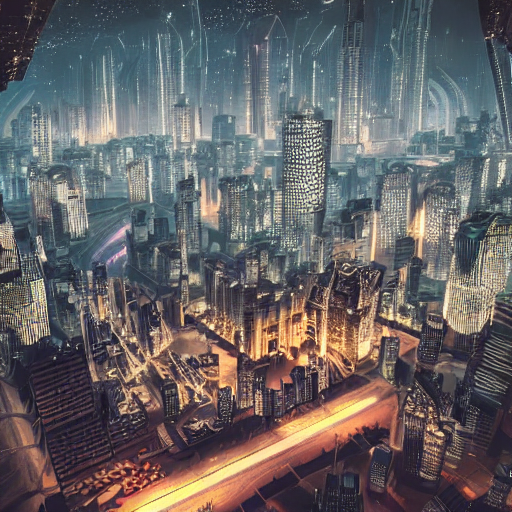

  0%|          | 0/50 [00:00<?, ?it/s]

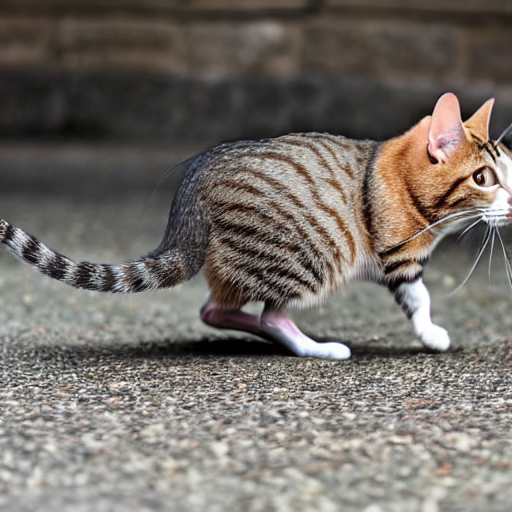

  0%|          | 0/50 [00:00<?, ?it/s]

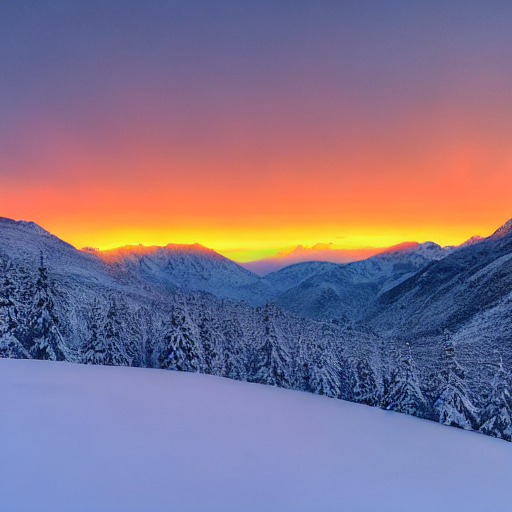

  0%|          | 0/50 [00:00<?, ?it/s]

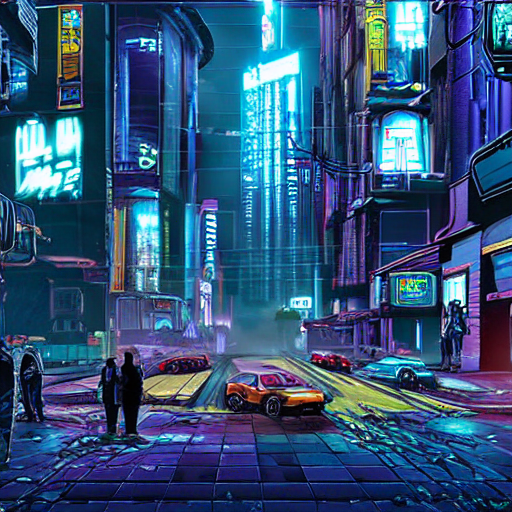

  0%|          | 0/50 [00:00<?, ?it/s]

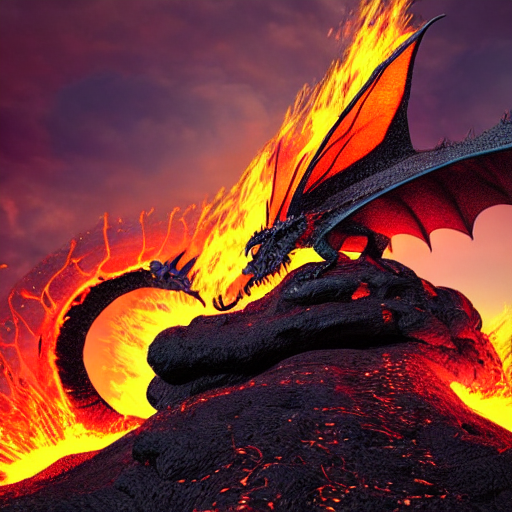

In [6]:
for i, prompt in enumerate(prompts):
    image = pipe(prompt).images[0]
    image.save(f"{output_dir}/image_{i+1}.png")
    display(image)

Task 2

In [7]:
!pip install diffusers transformers accelerate torch safetensors pillow


In [8]:
import torch
from diffusers import StableDiffusionPipeline

model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16
).to("cuda")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [9]:
labels = [
    "Normal anatomy – healthy lungs, age & gender variations",
    "Infectious patterns – bacterial/viral pneumonia, COVID-like opacities",
    "Lung opacities – focal, diffuse, ground-glass, consolidations",
    "Pleural conditions – pleural effusion, pneumothorax",
    "Structural lesions – nodules, masses, fibrosis",
    "Cardiac findings – cardiomegaly, vascular congestion",
    "Medical devices – tubes, catheters, pacemakers",
    "Imaging artifacts – noise, motion blur, exposure issues",
    "View & positioning – PA/AP views, rotation, supine/erect",
    "Domain shift – scanner, hospital, and resolution variations"
]


In [10]:
import os
import re

def clean_label(label):
    return re.sub(r'[^a-zA-Z0-9_]', '_', label.split("–")[0].strip())

base_dir = "/content/xray_dataset"
os.makedirs(base_dir, exist_ok=True)

clean_labels = {}

for label in labels:
    folder = clean_label(label)
    clean_labels[label] = folder
    os.makedirs(os.path.join(base_dir, folder), exist_ok=True)


In [11]:
variation_descriptions = [
    "very mild and early-stage findings",
    "mild but clearly visible clinical findings",
    "moderate severity with noticeable abnormalities",
    "severe and advanced pathological findings",
    "critical condition with extensive abnormalities"
]


In [12]:
def build_prompt(label, i):
    return f"""
    A high-resolution clinical chest X-ray image showing {label}.
    The case represents {variation_descriptions[i-1]}.
    The image should be medically accurate, realistic, and suitable for diagnostic use.
    Hospital imaging style, sharp anatomical details, proper contrast,
    no artistic effects, no cartoons, professional medical scan.
    """


In [13]:
from PIL import Image

for label in labels:
    folder = clean_labels[label]

    for i in range(1, 6):
        prompt = build_prompt(label, i)

        image = pipe(
            prompt,
            num_inference_steps=50,
            guidance_scale=8.5
        ).images[0]

        filename = f"{folder}_{i}.png"
        path = os.path.join(base_dir, folder, filename)
        image.save(path)

        print(f"Saved: {path}")


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/xray_dataset/Normal_anatomy/Normal_anatomy_1.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/xray_dataset/Normal_anatomy/Normal_anatomy_2.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/xray_dataset/Normal_anatomy/Normal_anatomy_3.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/xray_dataset/Normal_anatomy/Normal_anatomy_4.png


  0%|          | 0/50 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (79 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['scan .']


Saved: /content/xray_dataset/Normal_anatomy/Normal_anatomy_5.png


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['.']


Saved: /content/xray_dataset/Infectious_patterns/Infectious_patterns_1.png


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['medical scan .']


Saved: /content/xray_dataset/Infectious_patterns/Infectious_patterns_2.png


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['.']


Saved: /content/xray_dataset/Infectious_patterns/Infectious_patterns_3.png


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['scan .']


Saved: /content/xray_dataset/Infectious_patterns/Infectious_patterns_4.png


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['professional medical scan .']


Saved: /content/xray_dataset/Infectious_patterns/Infectious_patterns_5.png


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['medical scan .']


Saved: /content/xray_dataset/Lung_opacities/Lung_opacities_1.png


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', professional medical scan .']


Saved: /content/xray_dataset/Lung_opacities/Lung_opacities_2.png


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['medical scan .']


Saved: /content/xray_dataset/Lung_opacities/Lung_opacities_3.png


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['professional medical scan .']


Saved: /content/xray_dataset/Lung_opacities/Lung_opacities_4.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/xray_dataset/Lung_opacities/Lung_opacities_5.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/xray_dataset/Pleural_conditions/Pleural_conditions_1.png


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['.']


Saved: /content/xray_dataset/Pleural_conditions/Pleural_conditions_2.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/xray_dataset/Pleural_conditions/Pleural_conditions_3.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/xray_dataset/Pleural_conditions/Pleural_conditions_4.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/xray_dataset/Pleural_conditions/Pleural_conditions_5.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/xray_dataset/Structural_lesions/Structural_lesions_1.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/xray_dataset/Structural_lesions/Structural_lesions_2.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/xray_dataset/Structural_lesions/Structural_lesions_3.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/xray_dataset/Structural_lesions/Structural_lesions_4.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/xray_dataset/Structural_lesions/Structural_lesions_5.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/xray_dataset/Cardiac_findings/Cardiac_findings_1.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/xray_dataset/Cardiac_findings/Cardiac_findings_2.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/xray_dataset/Cardiac_findings/Cardiac_findings_3.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/xray_dataset/Cardiac_findings/Cardiac_findings_4.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/xray_dataset/Cardiac_findings/Cardiac_findings_5.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/xray_dataset/Medical_devices/Medical_devices_1.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/xray_dataset/Medical_devices/Medical_devices_2.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/xray_dataset/Medical_devices/Medical_devices_3.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/xray_dataset/Medical_devices/Medical_devices_4.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/xray_dataset/Medical_devices/Medical_devices_5.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/xray_dataset/Imaging_artifacts/Imaging_artifacts_1.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/xray_dataset/Imaging_artifacts/Imaging_artifacts_2.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/xray_dataset/Imaging_artifacts/Imaging_artifacts_3.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/xray_dataset/Imaging_artifacts/Imaging_artifacts_4.png


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['medical scan .']


Saved: /content/xray_dataset/Imaging_artifacts/Imaging_artifacts_5.png


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['scan .']


Saved: /content/xray_dataset/View___positioning/View___positioning_1.png


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['professional medical scan .']


Saved: /content/xray_dataset/View___positioning/View___positioning_2.png


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['scan .']


Saved: /content/xray_dataset/View___positioning/View___positioning_3.png


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['medical scan .']


Saved: /content/xray_dataset/View___positioning/View___positioning_4.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/xray_dataset/View___positioning/View___positioning_5.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/xray_dataset/Domain_shift/Domain_shift_1.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/xray_dataset/Domain_shift/Domain_shift_2.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/xray_dataset/Domain_shift/Domain_shift_3.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/xray_dataset/Domain_shift/Domain_shift_4.png


  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Saved: /content/xray_dataset/Domain_shift/Domain_shift_5.png


In [15]:
# Install CLIP properly
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

import torch
import clip
import os
from PIL import Image

# Device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load CLIP model
model, preprocess = clip.load("ViT-B/32", device=device)

# Your medical labels
labels = [
    "Normal anatomy – healthy lungs, age & gender variations",
    "Infectious patterns – bacterial/viral pneumonia, COVID-like opacities",
    "Lung opacities – focal, diffuse, ground-glass, consolidations",
    "Pleural conditions – pleural effusion, pneumothorax",
    "Structural lesions – nodules, masses, fibrosis",
    "Cardiac findings – cardiomegaly, vascular congestion",
    "Medical devices – tubes, catheters, pacemakers",
    "Imaging artifacts – noise, motion blur, exposure issues",
    "View & positioning – PA/AP views, rotation, supine/erect",
    "Domain shift – scanner, hospital, and resolution variations"
]

# Encode text labels
text_tokens = clip.tokenize(labels).to(device)
text_features = model.encode_text(text_tokens)

# Dataset path
dataset_path = "/content/xray_dataset"

# Classify all images
for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)

    if not os.path.isdir(folder_path):
        continue

    print(f"\n📁 Folder: {folder}")

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)

        image = preprocess(Image.open(img_path).convert("RGB")).unsqueeze(0).to(device)

        with torch.no_grad():
            image_features = model.encode_image(image)
            similarity = (image_features @ text_features.T).softmax(dim=-1)
            best_match = similarity.argmax().item()

        print(f"{img_name} → {labels[best_match]}")


  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-dhagym0x
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-dhagym0x
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369490 sha256=45f32b0ec454a7e9548a710eef1493696831c4753d83403478bc8e35d15dc5cd
  Stored in directory: /tmp/pip-ephem-wheel-cache-aaell834/wheels/35/3e/df/3d24cbfb3b6a06f17a2bfd7d1138900d4365d9028aa8f6e92f
Successfully built clip


100%|████████████████████████████████████████| 338M/338M [00:03<00:00, 113MiB/s]



📁 Folder: View___positioning
View___positioning_1.png → Normal anatomy – healthy lungs, age & gender variations
View___positioning_2.png → Medical devices – tubes, catheters, pacemakers
View___positioning_3.png → Medical devices – tubes, catheters, pacemakers
View___positioning_5.png → Medical devices – tubes, catheters, pacemakers
View___positioning_4.png → Medical devices – tubes, catheters, pacemakers

📁 Folder: Cardiac_findings
Cardiac_findings_1.png → Medical devices – tubes, catheters, pacemakers
Cardiac_findings_2.png → Normal anatomy – healthy lungs, age & gender variations
Cardiac_findings_5.png → Medical devices – tubes, catheters, pacemakers
Cardiac_findings_4.png → Normal anatomy – healthy lungs, age & gender variations
Cardiac_findings_3.png → Normal anatomy – healthy lungs, age & gender variations

📁 Folder: Infectious_patterns
Infectious_patterns_5.png → Medical devices – tubes, catheters, pacemakers
Infectious_patterns_3.png → Medical devices – tubes, catheters, pacema